In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, auc, recall_score, precision_score, roc_curve
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import eli5
import os


from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
pd.set_option("display.max_rows", None, "display.max_columns", None)

C:\Users\jacke\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\jacke\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [4]:
df = pd.read_csv(os.path.join("Covid_Dataset.csv"))

In [5]:
covid_df=df.drop(['Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market'], axis=1)

In [6]:
covid_df.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,2771,2821,2883,4383


<AxesSubplot:xlabel='COVID-19', ylabel='count'>

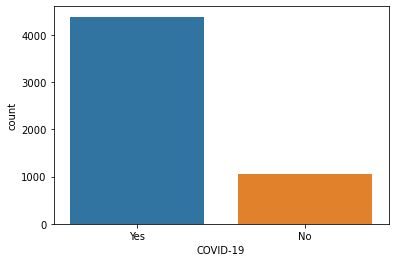

In [10]:
sns.countplot(x='COVID-19',data=covid_df)

Text(0.5, 1.0, 'number of cases')

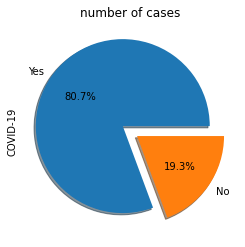

In [11]:
covid_df["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases')

In [10]:
covid_df.replace(('Yes', 'No'), (1, 0), inplace=True)

array([[<AxesSubplot:title={'center':'Breathing Problem'}>,
        <AxesSubplot:title={'center':'Fever'}>,
        <AxesSubplot:title={'center':'Dry Cough'}>,
        <AxesSubplot:title={'center':'Sore throat'}>],
       [<AxesSubplot:title={'center':'Running Nose'}>,
        <AxesSubplot:title={'center':'Asthma'}>,
        <AxesSubplot:title={'center':'Chronic Lung Disease'}>,
        <AxesSubplot:title={'center':'Headache'}>],
       [<AxesSubplot:title={'center':'Heart Disease'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'Hyper Tension'}>,
        <AxesSubplot:title={'center':'Fatigue '}>],
       [<AxesSubplot:title={'center':'Gastrointestinal '}>,
        <AxesSubplot:title={'center':'COVID-19'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

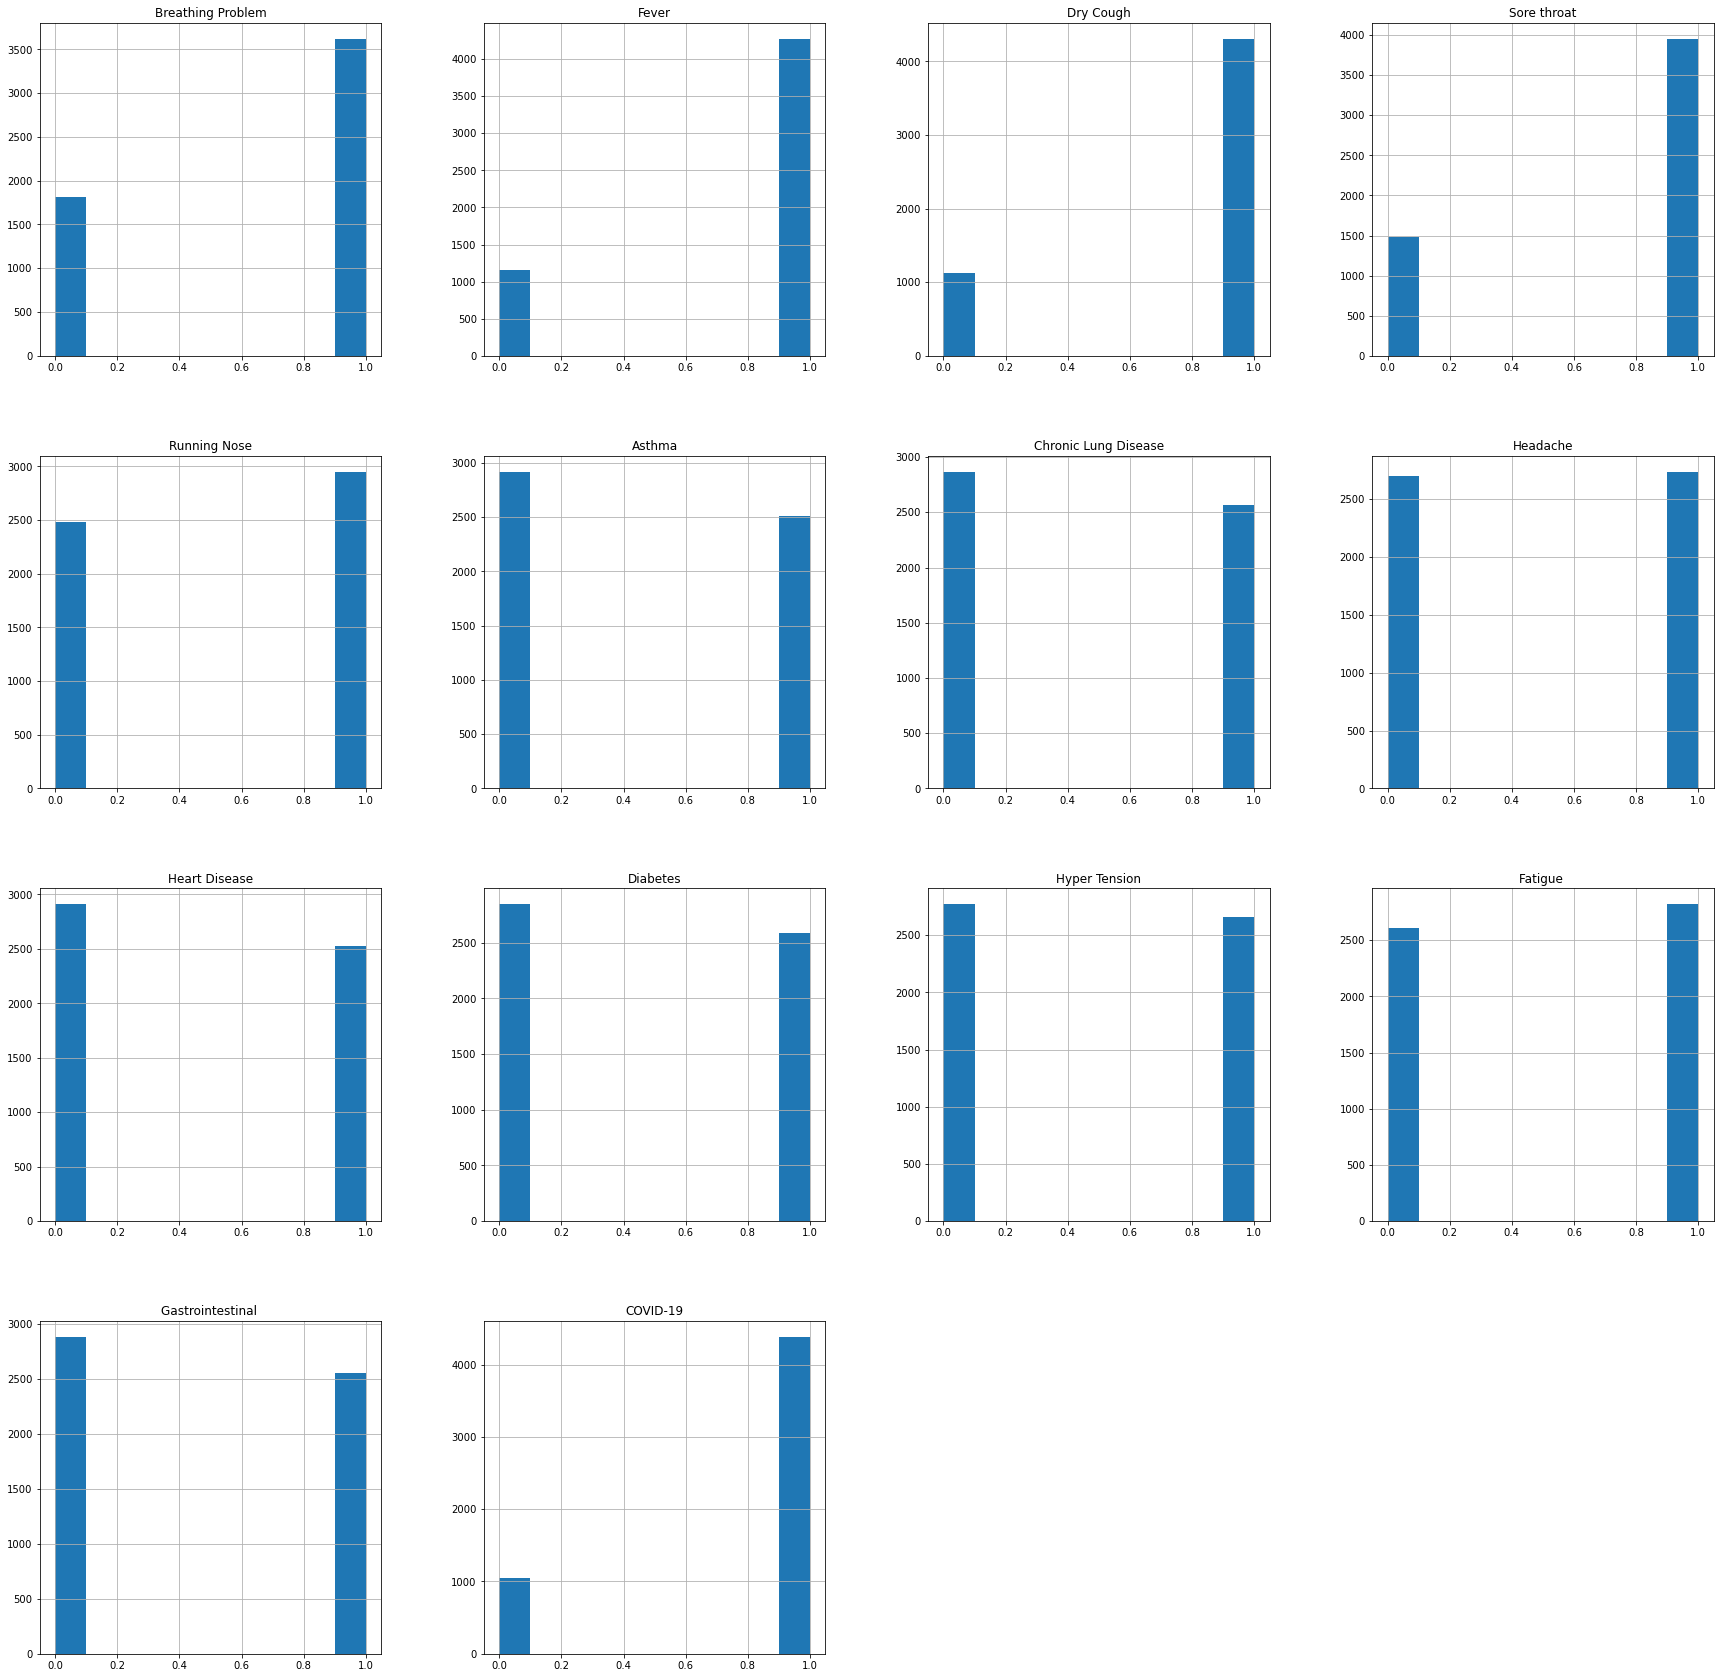

In [15]:
covid_df.hist(figsize=(30,30))

In [16]:
corr=covid_df.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.040627


In [11]:
X=covid_df.drop(["COVID-19"], axis=1)
y=covid_df["COVID-19"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [24]:
#Random Forest Classifier
rfc = RandomForestClassifier().fit(X_train, y_train)
print(f'Random Forest Training Score: {rfc.score(X_train, y_train)}')
print(f'Random Forest Testing Score: {rfc.score(X_test, y_test)}')

print('')
#Logistic Regression
lr = LogisticRegression().fit(X_train, y_train)
print(f'Logistic Regresion Training Score: {lr.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {lr.score(X_test, y_test)}')

print('')
#Decison Tree 
DT = DecisionTreeClassifier().fit(X_train, y_train)
print(f'Decision Tree Testing Score: {DT.score(X_train, y_train)}')
print(f'Decision Tree Testing Score: {DT.score(X_test, y_test)}')

Random Forest Training Score: 0.981840490797546
Random Forest Testing Score: 0.9823399558498896

Logistic Regresion Training Score: 0.9158282208588957
Logistic Regression Testing Score: 0.9102281089036056

Decision Tree Testing Score: 0.981840490797546
Decision Tree Testing Score: 0.9823399558498896


#### Parameter Tuning

In [16]:
#Random Forest
random_forest = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {random_forest.score(X_train, y_train)}')
print(f'Testing Score: {random_forest.score(X_test, y_test)}')

print('')

#Decison Tree
Decision_Tree = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy").fit(X_train, y_train)
print(f'Decision Tree Testing Score: {Decision_Tree.score(X_train, y_train)}')
print(f'Decision Tree Testing Score: {Decision_Tree.score(X_test, y_test)}')

print('')
#Logistic Regression
LR1 = LogisticRegression().fit(X_train, y_train)
print(f'Logistic Regression Training Score: {LR1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {LR1.score(X_test, y_test)}')

Training Score: 0.981840490797546
Testing Score: 0.9823399558498896

Decision Tree Testing Score: 0.9445398773006135
Decision Tree Testing Score: 0.9403973509933775

Logistic Regression Training Score: 0.9158282208588957
Logistic Regression Testing Score: 0.9102281089036056


#### Grid Search

In [17]:
params = {
    "max_depth":[15,20,25], 
    "n_estimators":[27,30,33],
    "criterion":["gini", "entropy"],
}

rfc = RandomForestClassifier()

rf_reg = GridSearchCV(rfc, params, cv = 10, n_jobs =10)
rf_reg.fit(X_train, y_train)
print(rf_reg.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=27,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [18]:
rfc_tuned = RandomForestClassifier(max_depth=15, n_estimators=27)
rfc_tuned.fit(X_train, y_train)
score = cross_val_score(rfc,X_test,y_test,n_jobs=1,scoring="accuracy")
print(score)

[0.97058824 0.97426471 0.97794118 0.95588235 0.97416974]


In [ ]:
# Model is best without parameter tuning

#### More Modeling

In [19]:
#KNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = knn.score(X_test, y_test)*100
print(f'Model Accuracy: {knn_accuracy}')

Model Accuracy: 93.15673289183223


In [20]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train, y_train)
gaussian_accuracy = model.score(X_test, y_test) *100
print(f'Model Accuracy: {gaussian_accuracy}')


Model Accuracy: 90.13980868285503


In [21]:
#SVM
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)
svm_model_accuracy = model.score(X_test, y_test) *100
print(f'Model Accuracy: {svm_model_accuracy}')


Model Accuracy: 90.13980868285503


## Score Check

In [25]:
lr_accuracy = lr.score(X_test, y_test) *100
rf_accuracy = rfc.score(X_test, y_test) *100
dt_accuracy = DT.score(X_test, y_test) *100

In [28]:
model_scores = {'Models': ['Logistic Regression', 'KNeighbors Classifier', 'Gaussian Naive Bayes', ' SVM','Random Forest','Decision Tree'], 
                'Scores': [lr_accuracy, knn_accuracy, gaussian_accuracy, svm_model_accuracy,rf_accuracy,dt_accuracy]} 

In [29]:
scores_df=pd.DataFrame(model_scores)
scores_df.sort_values(by=['Scores'], ascending=False,inplace=True)
  
scores_df

,Models,Scores
4,Random Forest,98.233996
5,Decision Tree,98.233996
1,KNeighbors Classifier,93.156733
0,Logistic Regression,91.022811
2,Gaussian Naive Bayes,90.139809
3,SVM,90.139809


### Random Forest Score

In [30]:
rf_pred=rfc.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

fpr, tpr, thresholds = roc_curve(y_test, rf_pred, pos_label=1)
print("AUC: ", auc(fpr, tpr))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test,rf_pred))

Accuracy: 98.23%
AUC:  0.9772832572832572
[[ 251    8]
 [  16 1084]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       259
           1       0.99      0.99      0.99      1100

    accuracy                           0.98      1359
   macro avg       0.97      0.98      0.97      1359
weighted avg       0.98      0.98      0.98      1359



### LR Score

In [31]:
lr_pred=lr.predict(X_test)

accuracy = accuracy_score(y_test, lr_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

fpr, tpr, thresholds = roc_curve(y_test, lr_pred, pos_label=1)
print("AUC: ", auc(fpr, tpr))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test,lr_pred))

Accuracy: 91.02%
AUC:  0.8058055458055459
[[ 165   94]
 [  28 1072]]
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       259
           1       0.92      0.97      0.95      1100

    accuracy                           0.91      1359
   macro avg       0.89      0.81      0.84      1359
weighted avg       0.91      0.91      0.90      1359



### KNN Score

In [32]:
knn_pred=knn.predict(X_test)

accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

fpr, tpr, thresholds = roc_curve(y_test, knn_pred, pos_label=1)
print("AUC: ", auc(fpr, tpr))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test,knn_pred))

Accuracy: 93.16%
AUC:  0.9075447525447525
[[ 225   34]
 [  59 1041]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       259
           1       0.97      0.95      0.96      1100

    accuracy                           0.93      1359
   macro avg       0.88      0.91      0.89      1359
weighted avg       0.93      0.93      0.93      1359



### Gaussian Score

In [33]:
g_pred=model.predict(X_test)

accuracy = accuracy_score(y_test, g_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

fpr, tpr, thresholds = roc_curve(y_test, g_pred, pos_label=1)
print("AUC: ", auc(fpr, tpr))
print(confusion_matrix(y_test, g_pred))
print(classification_report(y_test,g_pred))

Accuracy: 90.14%
AUC:  0.8638171288171288
[[ 208   51]
 [  83 1017]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.76       259
           1       0.95      0.92      0.94      1100

    accuracy                           0.90      1359
   macro avg       0.83      0.86      0.85      1359
weighted avg       0.91      0.90      0.90      1359



### SVM Score

In [34]:
svm_pred=svm_model.predict(X_test)

accuracy = accuracy_score(y_test, svm_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

fpr, tpr, thresholds = roc_curve(y_test, svm_pred, pos_label=1)
print("AUC: ", auc(fpr, tpr))
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test,svm_pred))

Accuracy: 92.57%
AUC:  0.8433941733941734
[[ 184   75]
 [  26 1074]]
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       259
           1       0.93      0.98      0.96      1100

    accuracy                           0.93      1359
   macro avg       0.91      0.84      0.87      1359
weighted avg       0.92      0.93      0.92      1359



In [ ]:
#Random Forest has the highest score with an accuracy of .98 and a recall of .97. This model tends to have high accuracy prediction and can handle large numbers of features due to the embedded feature selection in the model generation process.
#We are using recall as our metric because we need the percentage of actual positive results predicted correctly.
#In the confusion Matrix Random Forest has the least amount of False positives and False negatives compared to the other models. 


In [35]:
ranfor=RandomForestClassifier().fit(X_train, y_train)
perm = PermutationImportance(ranfor).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1255 ± 0.0077,Breathing Problem
0.0851 ± 0.0113,Dry Cough
0.0487 ± 0.0067,Fever
0.0444 ± 0.0089,Sore throat
0.0225 ± 0.0070,Gastrointestinal
0.0216 ± 0.0071,Fatigue
0.0199 ± 0.0044,Heart Disease
0.0193 ± 0.0043,Hyper Tension
0.0175 ± 0.0031,Asthma
0.0153 ± 0.0049,Chronic Lung Disease


In [ ]:
#Top features for Covid symptoms are Breathing Problems, Dry cough, and a sore throat